In [1]:
import pandas as pd
import numpy as np
import zipfile

## Import Data

In [2]:
! wget -P ../../data/raw https://aqua.kingcounty.gov/extranet/assessor/Parcel.zip
! wget -P ../../data/raw https://aqua.kingcounty.gov/extranet/assessor/Real%20Property%20Sales.zip
! wget -P ../../data/raw https://aqua.kingcounty.gov/extranet/assessor/Residential%20Building.zip

--2020-09-28 09:03:28--  https://aqua.kingcounty.gov/extranet/assessor/Parcel.zip
Resolving aqua.kingcounty.gov (aqua.kingcounty.gov)... 146.129.240.28
Connecting to aqua.kingcounty.gov (aqua.kingcounty.gov)|146.129.240.28|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31115221 (30M) [application/x-zip-compressed]
Saving to: '../../data/raw/Parcel.zip.1'

     0K .......... .......... .......... .......... ..........  0%  576K 53s
    50K .......... .......... .......... .......... ..........  0% 1.56M 36s
   100K .......... .......... .......... .......... ..........  0% 1.61M 30s
   150K .......... .......... .......... .......... ..........  0% 1.56M 27s
   200K .......... .......... .......... .......... ..........  0% 1.88M 25s
   250K .......... .......... .......... .......... ..........  0% 1.56M 24s
   300K .......... .......... .......... .......... ..........  1% 10.7M 21s
   350K .......... .......... .......... .......... ..........  1% 1.74M 20s

 10000K .......... .......... .......... .......... .......... 33% 1.32M 10s
 10050K .......... .......... .......... .......... .......... 33% 2.24M 10s
 10100K .......... .......... .......... .......... .......... 33% 1.79M 10s
 10150K .......... .......... .......... .......... .......... 33% 1.74M 10s
 10200K .......... .......... .......... .......... .......... 33% 2.06M 10s
 10250K .......... .......... .......... .......... .......... 33% 3.57M 9s
 10300K .......... .......... .......... .......... .......... 34% 2.82M 9s
 10350K .......... .......... .......... .......... .......... 34% 1.77M 9s
 10400K .......... .......... .......... .......... .......... 34% 1.70M 9s
 10450K .......... .......... .......... .......... .......... 34% 2.44M 9s
 10500K .......... .......... .......... .......... .......... 34% 2.52M 9s
 10550K .......... .......... .......... .......... .......... 34% 2.03M 9s
 10600K .......... .......... .......... .......... .......... 35% 3.28M 9s
 10650K

--2020-09-28 09:03:42--  https://aqua.kingcounty.gov/extranet/assessor/Real%20Property%20Sales.zip
Resolving aqua.kingcounty.gov (aqua.kingcounty.gov)... 146.129.240.28
Connecting to aqua.kingcounty.gov (aqua.kingcounty.gov)|146.129.240.28|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 129586067 (124M) [application/x-zip-compressed]
Saving to: '../../data/raw/Real Property Sales.zip.1'

     0K .......... .......... .......... .......... ..........  0%  832K 2m32s
    50K .......... .......... .......... .......... ..........  0%  917K 2m25s
   100K .......... .......... .......... .......... ..........  0% 1.74M 2m0s
   150K .......... .......... .......... .......... ..........  0% 1.73M 1m48s
   200K .......... .......... .......... .......... ..........  0% 1.73M 1m41s
   250K .......... .......... .......... .......... ..........  0% 11.8M 86s
   300K .......... .......... .......... .......... ..........  0% 1.89M 83s
   350K .......... .......... .....

 84650K .......... .......... .......... .......... .......... 66% 2.51M 19s
 84700K .......... .......... .......... .......... .......... 66% 2.49M 19s
 84750K .......... .......... .......... .......... .......... 67% 2.05M 19s
 84800K .......... .......... .......... .......... .......... 67% 2.08M 19s
 84850K .......... .......... .......... .......... .......... 67% 2.14M 19s
 84900K .......... .......... .......... .......... .......... 67% 2.07M 19s
 84950K .......... .......... .......... .......... .......... 67% 2.19M 19s
 85000K .......... .......... .......... .......... .......... 67% 2.63M 19s
 85050K .......... .......... .......... .......... .......... 67% 2.50M 19s
 85100K .......... .......... .......... .......... .......... 67% 2.55M 19s
 85150K .......... .......... .......... .......... .......... 67% 1.99M 19s
 85200K .......... .......... .......... .......... .......... 67% 2.11M 19s
 85250K .......... .......... .......... .......... .......... 67% 2.41M 19s

100950K .......... .......... .......... .......... .......... 79% 1.50M 12s
101000K .......... .......... .......... .......... .......... 79% 1.60M 12s
101050K .......... .......... .......... .......... .......... 79% 36.5M 12s
101100K .......... .......... .......... .......... .......... 79% 1.74M 12s
101150K .......... .......... .......... .......... .......... 79% 1.78M 12s
101200K .......... .......... .......... .......... .......... 80% 1.74M 12s
101250K .......... .......... .......... .......... .......... 80% 1.77M 12s
101300K .......... .......... .......... .......... .......... 80% 1.85M 12s
101350K .......... .......... .......... .......... .......... 80% 9.46M 12s
101400K .......... .......... .......... .......... .......... 80% 1.91M 11s
101450K .......... .......... .......... .......... .......... 80% 1.65M 11s
101500K .......... .......... .......... .......... .......... 80% 1.70M 11s
101550K .......... .......... .......... .......... .......... 80% 3.25M 11s

--2020-09-28 09:04:41--  https://aqua.kingcounty.gov/extranet/assessor/Residential%20Building.zip
Resolving aqua.kingcounty.gov (aqua.kingcounty.gov)... 146.129.240.28
Connecting to aqua.kingcounty.gov (aqua.kingcounty.gov)|146.129.240.28|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24868715 (24M) [application/x-zip-compressed]
Saving to: '../../data/raw/Residential Building.zip.1'

     0K .......... .......... .......... .......... ..........  0%  933K 26s
    50K .......... .......... .......... .......... ..........  0% 1.59M 20s
   100K .......... .......... .......... .......... ..........  0% 1.71M 18s
   150K .......... .......... .......... .......... ..........  0% 1.80M 17s
   200K .......... .......... .......... .......... ..........  1% 3.16M 15s
   250K .......... .......... .......... .......... ..........  1% 2.45M 14s
   300K .......... .......... .......... .......... ..........  1% 2.10M 14s
   350K .......... .......... .......... .....

  9200K .......... .......... .......... .......... .......... 38% 1.78M 7s
  9250K .......... .......... .......... .......... .......... 38% 1.68M 7s
  9300K .......... .......... .......... .......... .......... 38% 1.72M 7s
  9350K .......... .......... .......... .......... .......... 38% 1.55M 7s
  9400K .......... .......... .......... .......... .......... 38% 20.7M 7s
  9450K .......... .......... .......... .......... .......... 39% 1.62M 7s
  9500K .......... .......... .......... .......... .......... 39% 1.54M 7s
  9550K .......... .......... .......... .......... .......... 39% 1.68M 7s
  9600K .......... .......... .......... .......... .......... 39% 1.71M 7s
  9650K .......... .......... .......... .......... .......... 39% 11.4M 7s
  9700K .......... .......... .......... .......... .......... 40% 1.99M 7s
  9750K .......... .......... .......... .......... .......... 40% 1.68M 7s
  9800K .......... .......... .......... .......... .......... 40% 1.76M 7s
  9850K ....

In [3]:
with zipfile.ZipFile('../../data/raw/Parcel.zip', 'r') as zip_ref:
    zip_ref.extractall('../../data/raw')
with zipfile.ZipFile('../../data/raw/Real Property Sales.zip', 'r') as zip_ref:
    zip_ref.extractall('../../data/raw')
with zipfile.ZipFile('../../data/raw/Residential Building.zip', 'r') as zip_ref:
    zip_ref.extractall('../../data/raw')

 13200K .......... .......... .......... .......... .......... 54% 1.56M 5s
 13250K .......... .......... .......... .......... .......... 54% 5.76M 5s
 13300K .......... .......... .......... .......... .......... 54% 1.79M 5s
 13350K .......... .......... .......... .......... .......... 55% 1.75M 5s
 13400K .......... .......... .......... .......... .......... 55% 1.70M 5s
 13450K .......... .......... .......... .......... .......... 55% 1.79M 5s
 13500K .......... .......... .......... .......... .......... 55% 20.6M 5s
 13550K .......... .......... .......... .......... .......... 55% 1.68M 5s
 13600K .......... .......... .......... .......... .......... 56% 1.49M 5s
 13650K .......... .......... .......... .......... .......... 56% 1.76M 5s
 13700K .......... .......... .......... .......... .......... 56% 1.60M 5s
 13750K .......... .......... .......... .......... .......... 56% 5.99M 5s
 13800K .......... .......... .......... .......... .......... 57% 2.24M 5s
 13850K ....

In [2]:
parcel = pd.read_csv("../../data/raw/EXTR_Parcel.csv", encoding='latin-1')
real_property_sales = pd.read_csv("../../data/raw/EXTR_RPSale.csv", encoding='latin-1', low_memory=False)
residential_building = pd.read_csv("../../data/raw/EXTR_ResBldg.csv", encoding='latin-1', low_memory=False)

## Clean Data and Filter For Needed Info

In [3]:
# Real Property Sales
# Identifyers are Major and Minor. Relevant data is SalePrice
# Clean real_property_sales to have proper values in Minor and Major and change type to int to match other data sets
real_property_sales = real_property_sales[['Major', 'Minor', 'SalePrice', 'DocumentDate']]
real_property_sales = real_property_sales[(real_property_sales['Major'].str.isdecimal()==True) &
                                          (real_property_sales['Minor'].str.isdecimal()==True)]
real_property_sales['Major'] = real_property_sales['Major'].astype('int64')
real_property_sales['Minor'] = real_property_sales['Minor'].astype('int64')
real_property_sales = real_property_sales[real_property_sales['SalePrice']>0]

In [4]:
real_property_sales.head()

,Major,Minor,SalePrice,DocumentDate
0,138860,110,245000,08/21/2014
4,213043,120,560000,12/20/2019
5,951120,900,85000,04/20/1989
7,122209,9002,5755000,04/25/2001
8,122209,9001,5755000,04/25/2001


In [5]:
# Parcel Filter for Necessary Columns
parcel = parcel[['Major', 'Minor', 'PropType', 'SqFtLot', 'WfntLocation',
                 'TrafficNoise', 'AirportNoise', 'PowerLines', 'OtherNuisances']]
parcel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616089 entries, 0 to 616088
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Major           616089 non-null  int64 
 1   Minor           616089 non-null  int64 
 2   PropType        616089 non-null  object
 3   SqFtLot         616089 non-null  int64 
 4   WfntLocation    616089 non-null  int64 
 5   TrafficNoise    616089 non-null  int64 
 6   AirportNoise    616089 non-null  int64 
 7   PowerLines      616089 non-null  object
 8   OtherNuisances  616089 non-null  object
dtypes: int64(6), object(3)
memory usage: 42.3+ MB


In [6]:
parcel = parcel[(parcel['PropType']=='R')]

In [7]:
# Residential Buiding Filter For Necessary Columns
residential_building = residential_building[['Major', 'Minor', 'NbrLivingUnits', 'SqFtTotLiving', 'SqFtOpenPorch', 'SqFtEnclosedPorch']]

In [8]:
# Create a column Has_Porch
residential_building['Has_Porch']= residential_building['SqFtOpenPorch'] + residential_building['SqFtEnclosedPorch']
residential_building['Has_Porch'] = [1  if p>0 else 0 for p in residential_building['Has_Porch']]

In [9]:
residential_building.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517554 entries, 0 to 517553
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   Major              517554 non-null  int64
 1   Minor              517554 non-null  int64
 2   NbrLivingUnits     517554 non-null  int64
 3   SqFtTotLiving      517554 non-null  int64
 4   SqFtOpenPorch      517554 non-null  int64
 5   SqFtEnclosedPorch  517554 non-null  int64
 6   Has_Porch          517554 non-null  int64
dtypes: int64(7)
memory usage: 27.6 MB


In [10]:
# Join all the tables on Major, Minor
# Have duplicate buildings sold at different dates. Need to only keep latest dates
merged_tables = (parcel.merge(real_property_sales, on = ['Major', 'Minor'])).merge(residential_building, on = ['Major', 'Minor']).drop_duplicates()
# Change dates to date time format
merged_tables[['Major', 'SqFtLot']].head(20)
merged_tables['DocumentDate'] = pd.to_datetime(merged_tables['DocumentDate'])

In [11]:
merged_tables.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 990905 entries, 0 to 996440
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Major              990905 non-null  int64         
 1   Minor              990905 non-null  int64         
 2   PropType           990905 non-null  object        
 3   SqFtLot            990905 non-null  int64         
 4   WfntLocation       990905 non-null  int64         
 5   TrafficNoise       990905 non-null  int64         
 6   AirportNoise       990905 non-null  int64         
 7   PowerLines         990905 non-null  object        
 8   OtherNuisances     990905 non-null  object        
 9   SalePrice          990905 non-null  int64         
 10  DocumentDate       990905 non-null  datetime64[ns]
 11  NbrLivingUnits     990905 non-null  int64         
 12  SqFtTotLiving      990905 non-null  int64         
 13  SqFtOpenPorch      990905 non-null  int64   

In [107]:
#Keeping only the most recent Sale_Price

# df = df.sort_values(by=['IDName', 'Time'])

# merged_tables.sort_values(by =['Major', 'Minor', 'DocumentDate']).drop_duplicates(subset = ['Major', 'Minor'], keep='last', inplace=True)
# df.groupby('A', group_keys=False).apply(lambda x: x.loc[x.B.idxmax()])

# merged_tables.groupby(['Major', 'Minor'], group_keys=False).apply(lambda x: x.loc[np.argmax(x['DocumentDate'])])

# merged_tables = merged_tables.sort_values(by=['Major', 'DocumentDate'])
# merged_tables.drop_duplicates(subset=['Major', 'Minor'], keep='last', inplace=True)

In [12]:
merged_tables = merged_tables[merged_tables['DocumentDate']>'2018']
merged_tables[['Major', 'Minor', 'SqFtLot']].sample(20)
merged_tables.shape

(79742, 16)

In [13]:
# Sort by Document Date
df = merged_tables #.sort_values(by = 'DocumentDate', ascending=False)

#Create Nuisances Column to replace other nuisance columns
df['Nuisances'] = 'No Nuisances'
df.loc[(df['TrafficNoise']>0), 'Nuisances'] = 'Traffic Noise'
df.loc[(df['AirportNoise']>0), 'Nuisances'] = 'Airport Noise'
df.loc[(df['PowerLines']=='Y'), 'Nuisances'] = 'Power Lines'
df.loc[(df['OtherNuisances']=='Y'), 'Nuisances'] = 'Other Nuisances'
df = df.drop(['TrafficNoise', 'AirportNoise', 'PowerLines', 'OtherNuisances', 'SqFtOpenPorch', 'SqFtEnclosedPorch'], axis='columns')

In [16]:
# WFNTLOCATION
# Waterfront location (Source: King County Assessments)
# Value	Definition
# 0	Unknown
# 1	Duwamish
# 2	Elliott Bay
# 3	Puget Sound
# 4	Lake Union
# 5	Ship Canal
# 6	Lake Washington
# 7	Lake Sammamish
# 8	Other lake
# 9	River or slough

df['WaterFrontLocation'] = df.WfntLocation.map({0 : 'None', 1 : 'Duwamish', 2 : 'Elliott Bay', 3 : 'Puget Sound', 4 : 'Lake Union',
                     5 : 'Ship Canal',  6 : 'Lake Washington', 7 : 'Lake Sammamish', 8 : 'Other lake', 9 : 'River or slough'})
df['Is_WaterFrontLocation'] = [1 if i>0 else 0 for i in df.WfntLocation]
df=df.drop('WfntLocation', axis='columns')

AttributeError: 'DataFrame' object has no attribute 'WfntLocation'

In [17]:
df['Has_Nuisance'] = [0 if n == 'No Nuisances' else 1 for n in df['Nuisances']]

# df[['Major', 'Minor', 'SqFtLot']].head()
df.head()

,Major,Minor,PropType,SqFtLot,SalePrice,DocumentDate,NbrLivingUnits,SqFtTotLiving,Has_Porch,Nuisances,WaterFrontLocation,Is_WaterFrontLocation,Has_Nuisance
3,286210,320,R,4280,975000,2018-07-17,1,2330,1,No Nuisances,None,0,0
59,513763,80,R,5239,607689,2018-04-26,1,2798,1,No Nuisances,None,0,0
60,513763,80,R,5239,612000,2019-03-01,1,2798,1,No Nuisances,None,0,0
64,152407,9065,R,254390,1500,2019-10-24,1,1630,1,Traffic Noise,None,0,1
65,152407,9065,R,254390,1500,2019-10-24,1,930,1,Traffic Noise,None,0,1


In [181]:
# Check x if have the relevant data to answer question
# [x]Higher square footage increases home sale price1, 2
# [x]Having a porch increases home sale price3, 4
# [x]Having a beachfront or lakefront increases home sale price5
# [x]The house filling a higher proportion of the overall lot decreases home sale price6
# [x]The cost per square foot is lower in duplexes than in single-family homes7
# [x]The presence of a nuisance (power lines, traffic noise, airport noise) decreases home sale price1, 5

## Graphical EDA

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

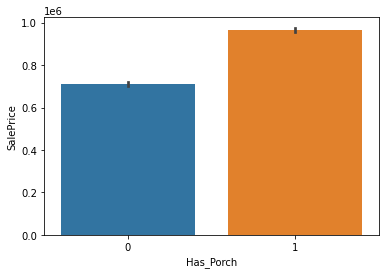

In [19]:
sns.barplot(df['Has_Porch'], df['SalePrice']);

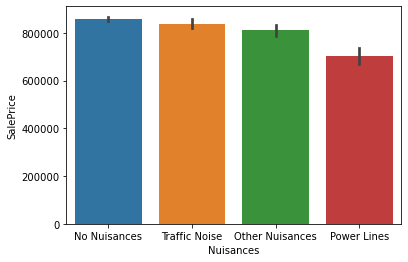

In [20]:
sns.barplot(df['Nuisances'], df['SalePrice']);

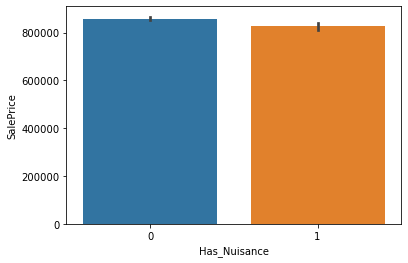

In [21]:
sns.barplot(df['Has_Nuisance'], df['SalePrice']);

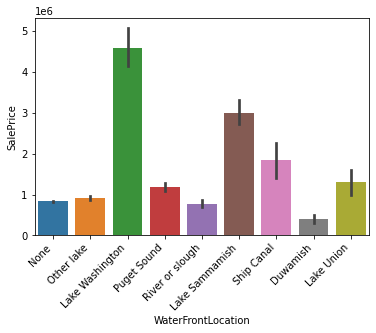

In [22]:
chart = sns.barplot(df.WaterFrontLocation, df.SalePrice)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right');

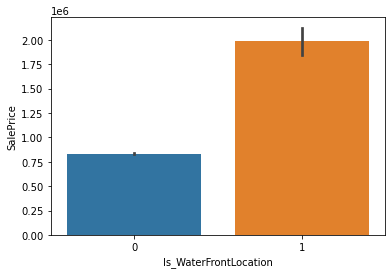

In [23]:
sns.barplot(df.Is_WaterFrontLocation, df.SalePrice);

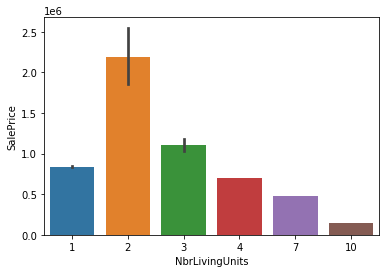

In [24]:
sns.barplot(df.NbrLivingUnits, df.SalePrice);

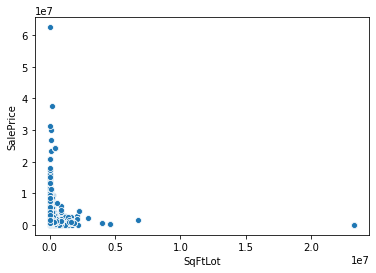

In [25]:
sns.scatterplot(df['SqFtLot'], df['SalePrice'])

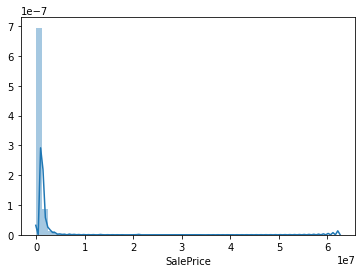

In [26]:
sns.distplot(df['SalePrice'])

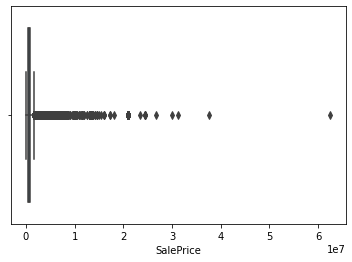

In [27]:
sns.boxplot(df['SalePrice'])

In [28]:
df2 = df[df['SalePrice'].between(df['SalePrice'].quantile(.15), df['SalePrice'].quantile(.85))]

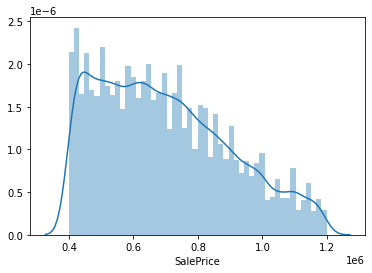

In [29]:
sns.distplot(df2['SalePrice'])

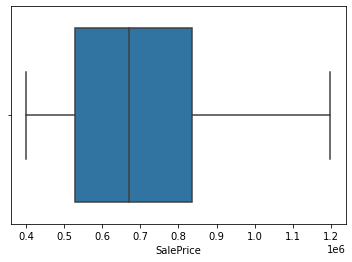

In [30]:
sns.boxplot(df2['SalePrice'])

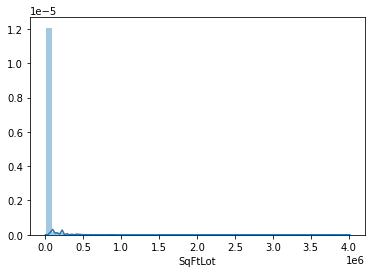

In [31]:
sns.distplot(df2['SqFtLot'])

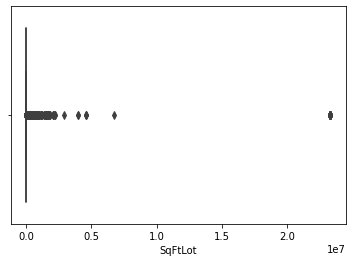

In [32]:
sns.boxplot(df['SqFtLot'])

In [33]:
df2 = df[df['SqFtLot'].between(df['SqFtLot'].quantile(.15), df['SqFtLot'].quantile(.85))]

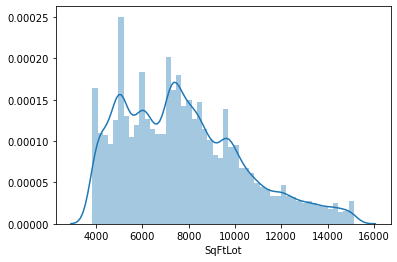

In [34]:
sns.distplot(df2['SqFtLot'])

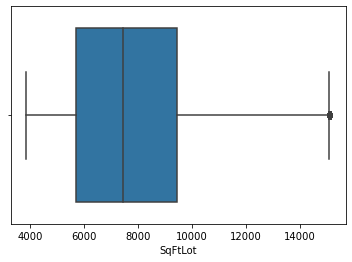

In [35]:
sns.boxplot(df2['SqFtLot'])

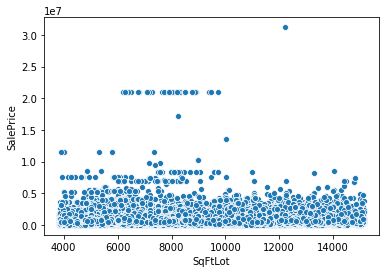

In [36]:
sns.scatterplot(df2['SqFtLot'], df2['SalePrice'])

In [37]:
df2=df.reset_index(drop=True)

In [38]:
df2.head()

,Major,Minor,PropType,SqFtLot,SalePrice,DocumentDate,NbrLivingUnits,SqFtTotLiving,Has_Porch,Nuisances,WaterFrontLocation,Is_WaterFrontLocation,Has_Nuisance
0,286210,320,R,4280,975000,2018-07-17,1,2330,1,No Nuisances,None,0,0
1,513763,80,R,5239,607689,2018-04-26,1,2798,1,No Nuisances,None,0,0
2,513763,80,R,5239,612000,2019-03-01,1,2798,1,No Nuisances,None,0,0
3,152407,9065,R,254390,1500,2019-10-24,1,1630,1,Traffic Noise,None,0,1
4,152407,9065,R,254390,1500,2019-10-24,1,930,1,Traffic Noise,None,0,1


In [39]:
df2.to_csv('../../data/raw/KingCountyHousingData.csv')